# Initialization

In [1]:
import importlib
from safedigital import temperature as TR
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
sns.set(color_codes=True)
os.chdir('../')
curDirectory = os.getcwd()
print(curDirectory)

c:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics


# Safe Air 12kV SGCC V=M
## 20220714
630A current till balanced no fault

Temperature balance time is 2022-07-14 15:39:30.
Temperature balance time is 2022-07-19 15:11:40.
Temperature balance time is 2022-07-20 15:54:40.


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Temperature balance time is 2022-07-21 15:11:10.
Temperature balance time is 2022-07-25 16:47:50.


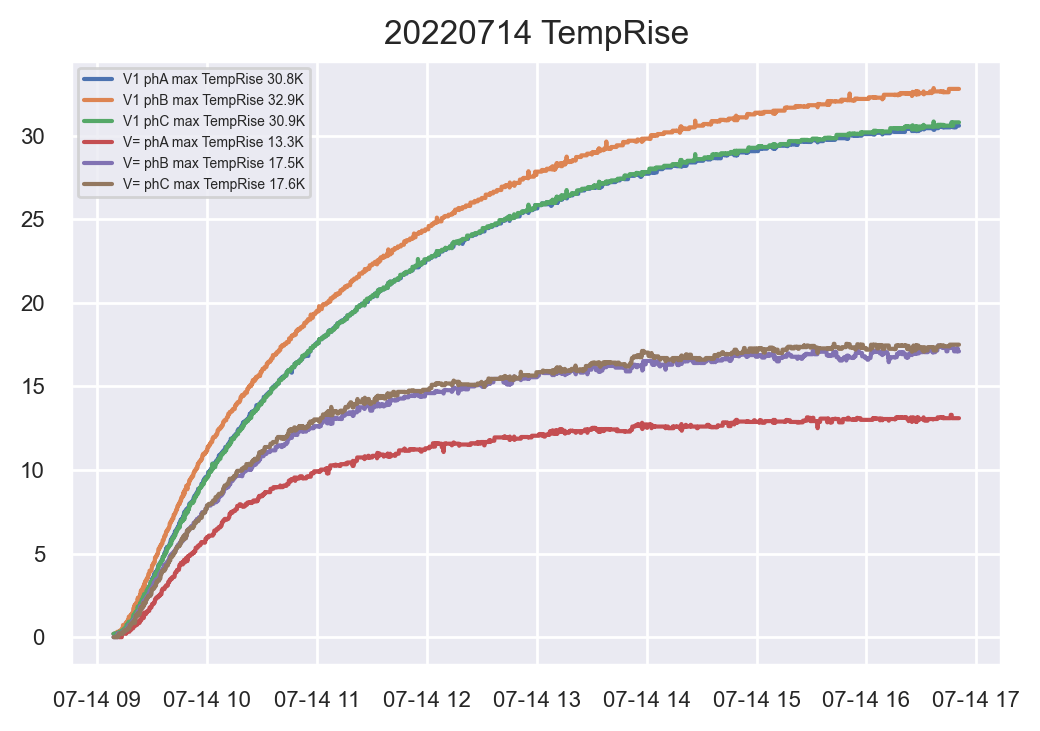

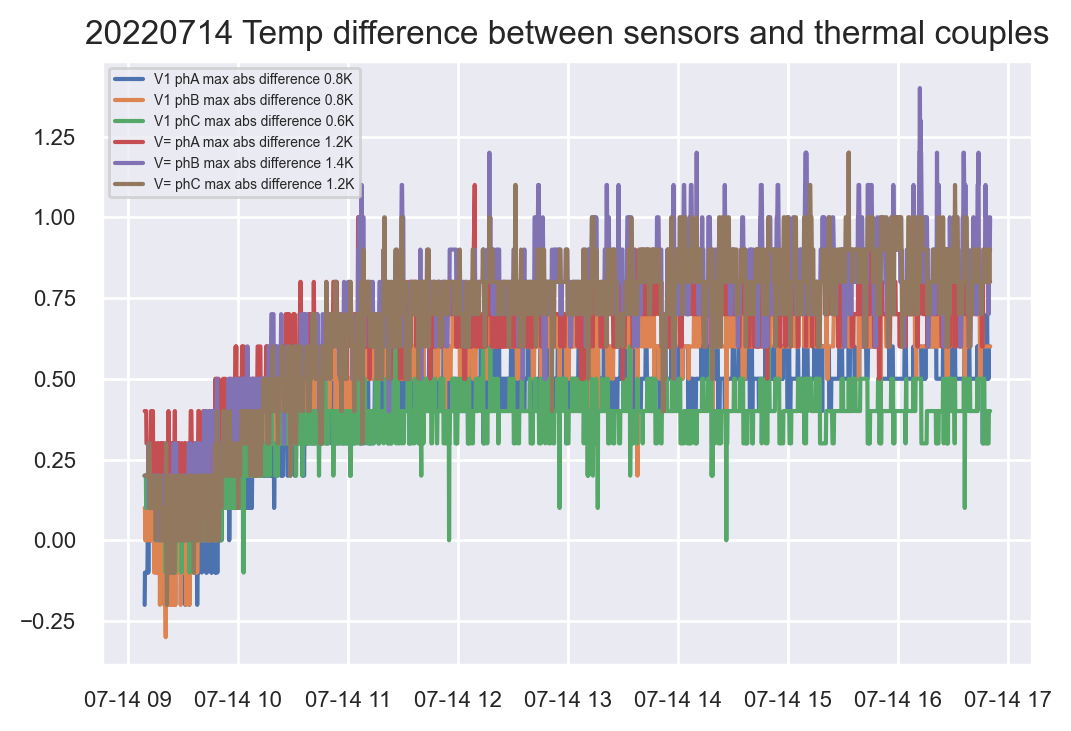

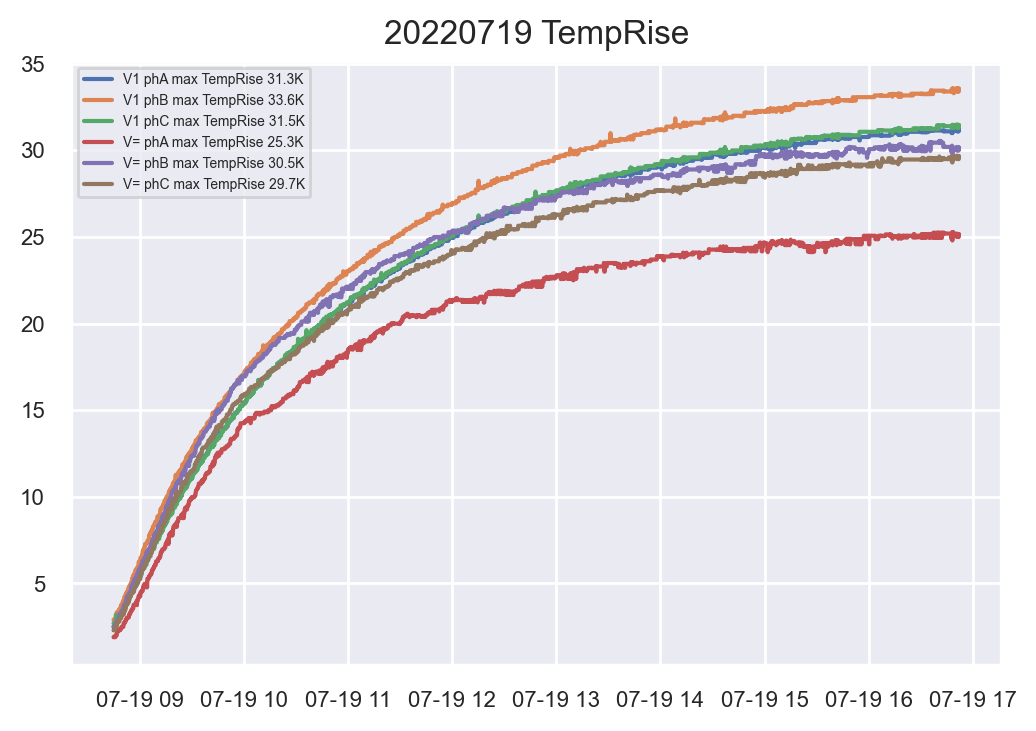

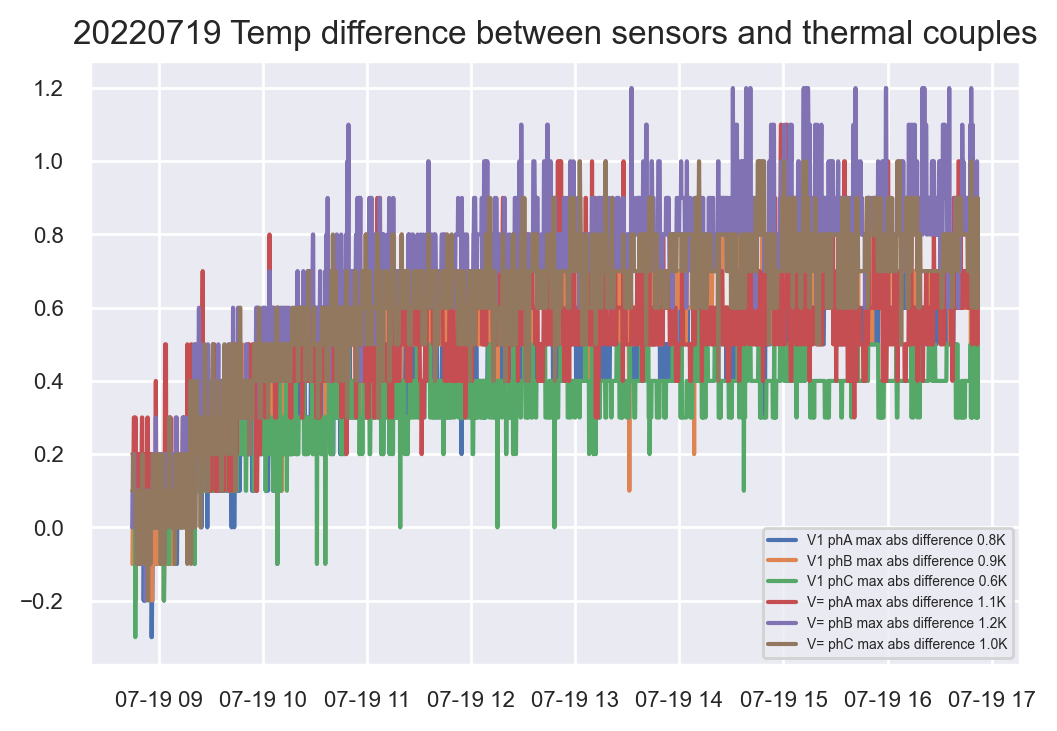

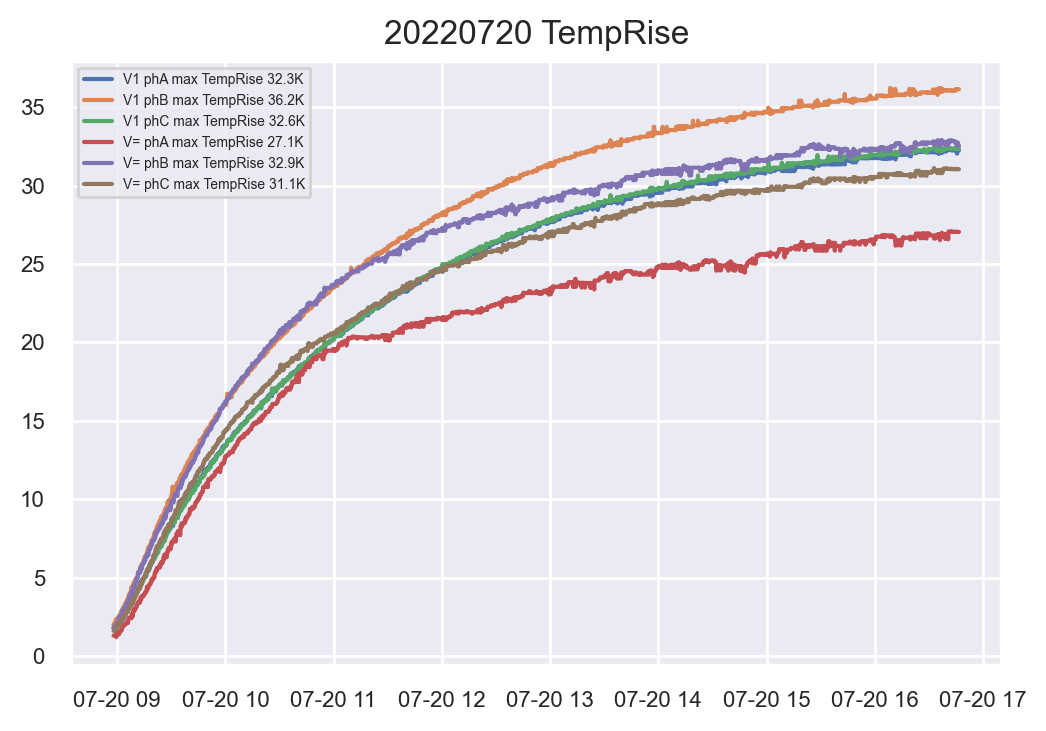

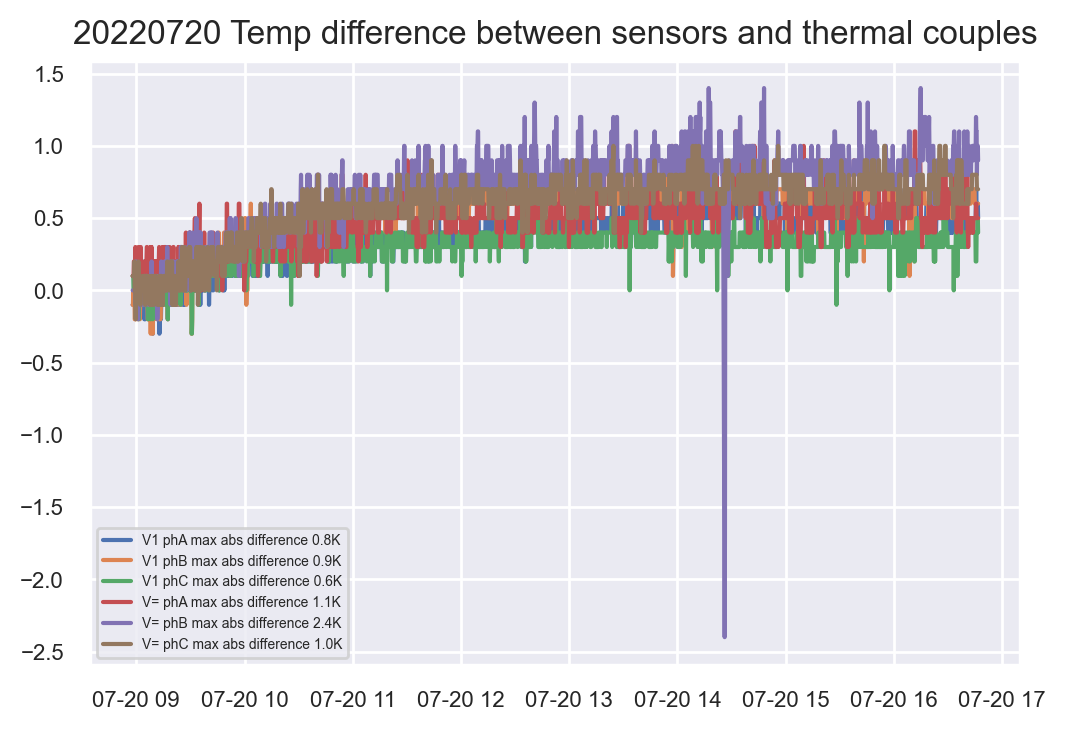

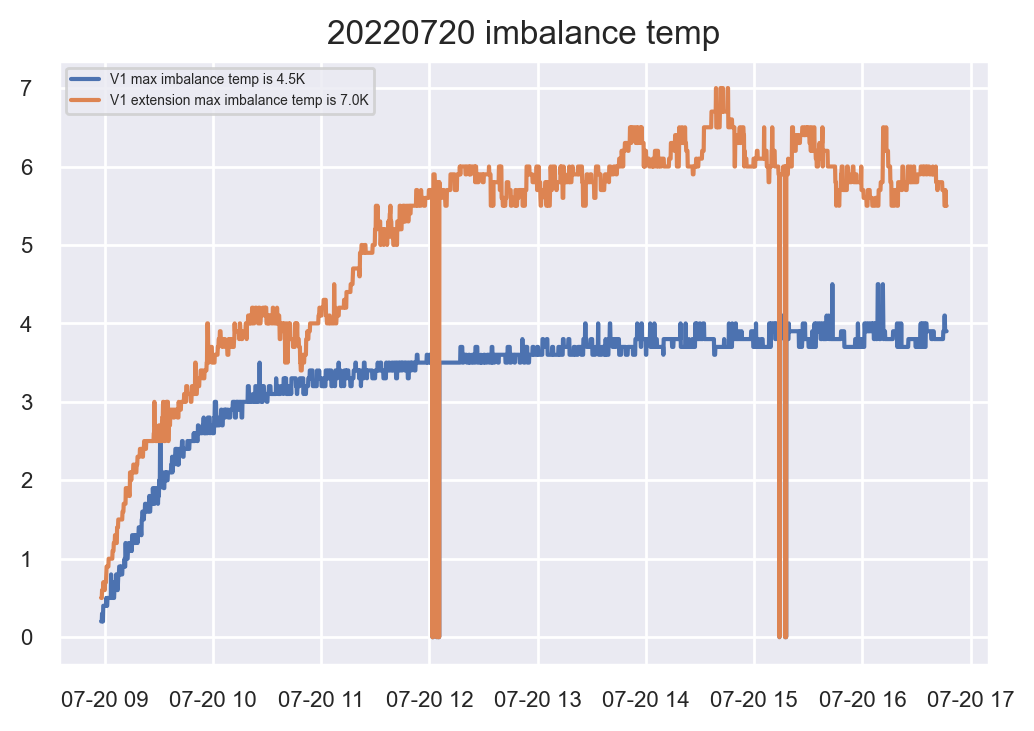

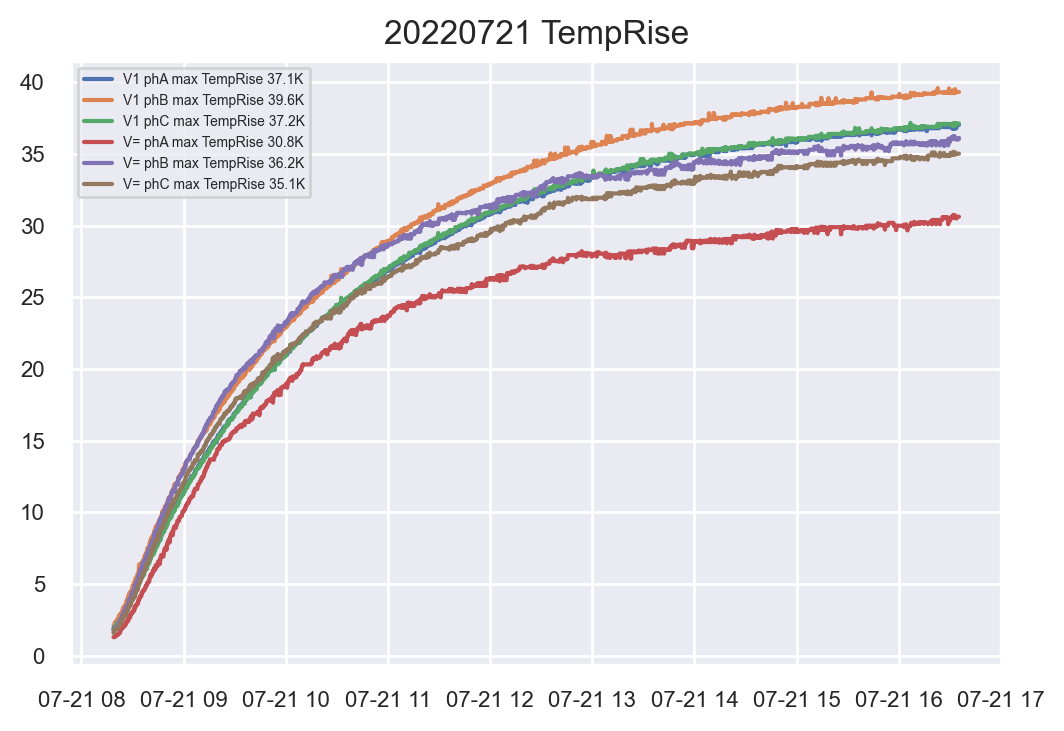

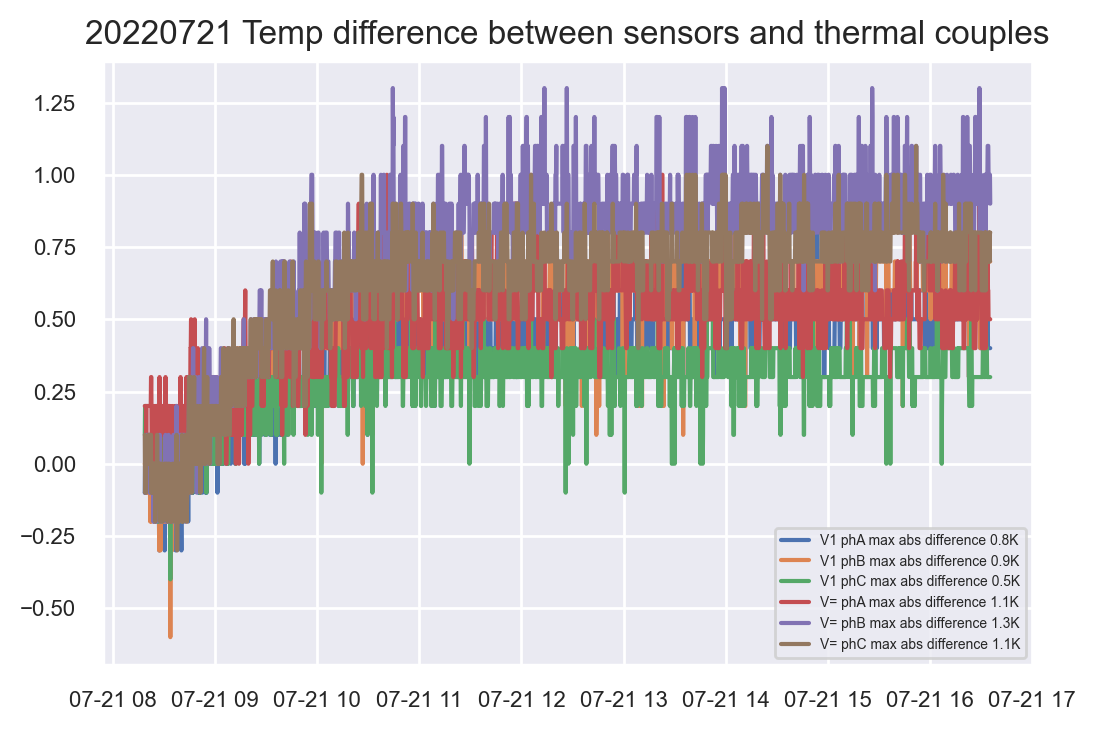

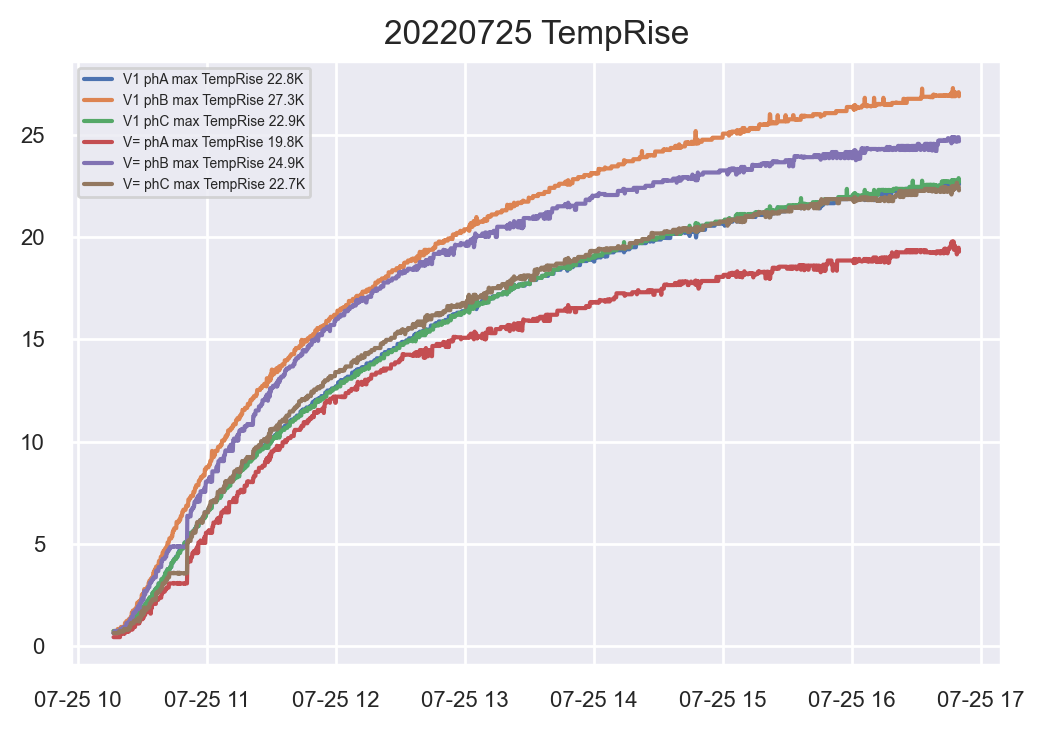

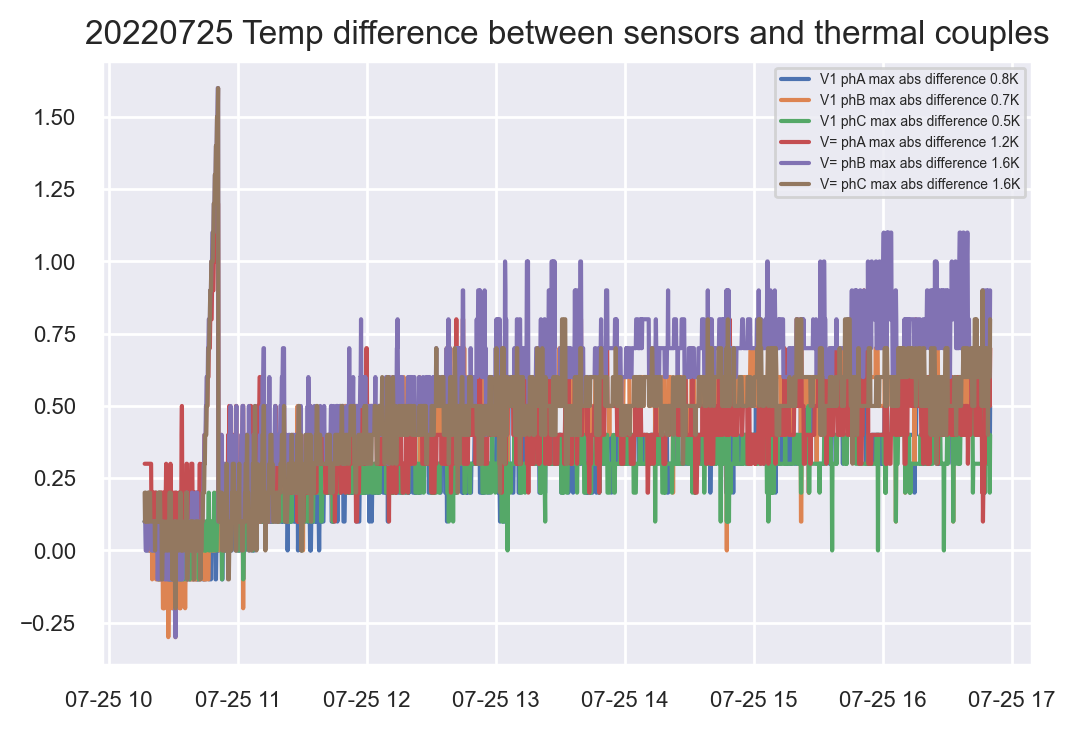

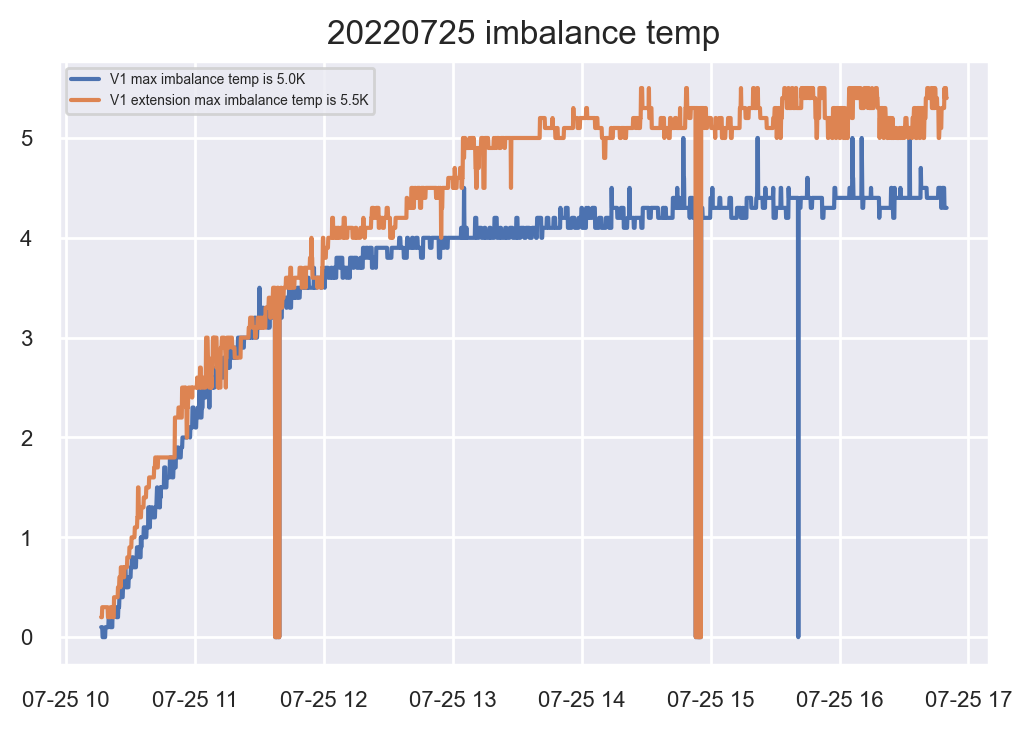

In [5]:
# file path for 20220714
importlib.reload(TR)
date_str_list = ['20220714','20220719','20220720','20220721','20220725']

test_name_list = ['_TR_SA12kV_SGCC_Top_Extension_No_Cover_630A',
				  '_TR_SA12kV_SGCC_Top_Extension_With_Cover_630A',
				  '_TR_SA12kV_SGCC_Top_Extension_With_Cover_630A_700A_630A',
				  '_TR_SA12kV_SGCC_Top_Extension_With_Cover_700A',
				  '_TR_SA12kV_SGCC_Top_Extension_With_Cover_500A_630A_500A']
for num in range(len(date_str_list)):
	date_str = date_str_list[num]
	test_name = test_name_list[num]				
	file_path = curDirectory + '\\' + date_str + test_name + '\\' + '1_Data formatted' + '\\' + date_str + '_data_clean_10s.csv'
	config_path = curDirectory + '\\' + date_str + test_name + '\\' + '1_Data formatted' + '\\' + date_str + '_config.json'
	fig_path = curDirectory + '\\' + date_str + test_name + '\\' + '3_Graphs'


	case = TR.TempRiseExperiment(file_path, config_path)
	case.find_balance_index(list(range(4, 13)) + list(range(60,64)))
	avg_amb_temp_ser = (case.data['t_oil_bottle_1'] + 
						case.data['t_oil_bottle_2'] +
						case.data['t_oil_bottle_3'] +
						case.data['t_oil_bottle_4']) / 4
    # data from sensors
	V1A_tr_ser = case.data['Unit1_A_T'] - avg_amb_temp_ser
	V1B_tr_ser = case.data['Unit1_B_T'] - avg_amb_temp_ser
	V1C_tr_ser = case.data['Unit1_C_T'] - avg_amb_temp_ser
	V1AA_tr_ser = case.data['Unit1=_A_T'] - avg_amb_temp_ser #V1=
	V1BB_tr_ser = case.data['Unit1=_B_T'] - avg_amb_temp_ser #V1=
	V1CC_tr_ser = case.data['Unit1=_C_T'] - avg_amb_temp_ser #V1=

	V1A_tr_ser_pos = case.drop_data_negative(V1A_tr_ser)
	V1B_tr_ser_pos = case.drop_data_negative(V1B_tr_ser)
	V1C_tr_ser_pos = case.drop_data_negative(V1C_tr_ser)
	V1AA_tr_ser_pos = case.drop_data_negative(V1AA_tr_ser)
	V1BB_tr_ser_pos = case.drop_data_negative(V1BB_tr_ser)
	V1CC_tr_ser_pos = case.drop_data_negative(V1CC_tr_ser)

	# data from thermal couples
	V1A_temp_dif_series = case.data['t_C1_phA_bushing'] - case.data['Unit1_A_T']
	V1B_temp_dif_series = case.data['t_C1_phB_bushing'] - case.data['Unit1_B_T']
	V1C_temp_dif_series = case.data['t_C1_phC_bushing'] - case.data['Unit1_C_T']
	V1AA_temp_dif_series = case.data['t_C1_phA_top_ext_bushing'] - case.data['Unit1=_A_T'] #V1=
	V1BB_temp_dif_series = case.data['t_C1_phB_top_ext_bushing'] - case.data['Unit1=_B_T'] #V1=
	V1CC_temp_dif_series = case.data['t_C1_phC_top_ext_bushing'] - case.data['Unit1=_C_T'] #V1=

	V1A_temp_dif_drop_series = case.drop_data_threshold(V1A_temp_dif_series, 10)
	V1B_temp_dif_drop_series = case.drop_data_threshold(V1B_temp_dif_series, 10)
	V1C_temp_dif_drop_series = case.drop_data_threshold(V1C_temp_dif_series, 10)
	V1AA_temp_dif_drop_series = case.drop_data_threshold(V1AA_temp_dif_series, 10)
	V1BB_temp_dif_drop_series = case.drop_data_threshold(V1BB_temp_dif_series, 10)
	V1CC_temp_dif_drop_series = case.drop_data_threshold(V1CC_temp_dif_series, 10)

	# Plot TR by sensors for cable bushings and top extension bushings
	plt.figure(dpi=200) 
	plt.plot(V1A_tr_ser_pos,
			# linewidth=0.5,
			 label="V1 phA max TempRise {:.1f}K".format(max(V1A_tr_ser_pos)))
	plt.plot(V1B_tr_ser_pos,
			# linewidth=0.5,
			 label="V1 phB max TempRise {:.1f}K".format(max(V1B_tr_ser_pos)))
	plt.plot(V1C_tr_ser_pos,
			# linewidth=0.5,
			 label="V1 phC max TempRise {:.1f}K".format(max(V1C_tr_ser_pos)))
	plt.plot(V1AA_tr_ser_pos,
			# linewidth=0.5,
			 label="V= phA max TempRise {:.1f}K".format(max(V1AA_tr_ser_pos)))
	plt.plot(V1BB_tr_ser_pos,
			# linewidth=0.5,
			 label="V= phB max TempRise {:.1f}K".format(max(V1BB_tr_ser_pos)))
	plt.plot(V1CC_tr_ser_pos,
			# linewidth=0.5,
			 label="V= phC max TempRise {:.1f}K".format(max(V1CC_tr_ser_pos)))
		
	plt.legend(fontsize=5)
	plt.tick_params(labelsize=8)
	plt.title(date_str + ' TempRise')
	
	# Plot Temp difference between sensors and thermal couples
	plt.figure(dpi=200) 
	plt.plot(V1A_temp_dif_drop_series,
			# linewidth=0.5,
			 label="V1 phA max abs difference {:.1f}K".format(max(abs(V1A_temp_dif_drop_series))))
	plt.plot(V1B_temp_dif_drop_series,
			# linewidth=0.5,
			 label="V1 phB max abs difference {:.1f}K".format(max(abs(V1B_temp_dif_drop_series))))
	plt.plot(V1C_temp_dif_drop_series,
			# linewidth=0.5,
			 label="V1 phC max abs difference {:.1f}K".format(max(abs(V1C_temp_dif_drop_series))))
	plt.plot(V1AA_temp_dif_drop_series,
			# linewidth=0.5,
			 label="V= phA max abs difference {:.1f}K".format(max(abs(V1AA_temp_dif_drop_series))))
	plt.plot(V1BB_temp_dif_drop_series,
			# linewidth=0.5,
			 label="V= phB max abs difference {:.1f}K".format(max(abs(V1BB_temp_dif_drop_series))))
	plt.plot(V1CC_temp_dif_drop_series,
			# linewidth=0.5,
			 label="V= phC max abs difference {:.1f}K".format(max(abs(V1CC_temp_dif_drop_series))))
		
	plt.legend(fontsize=5)
	plt.tick_params(labelsize=8)
	plt.title(date_str + ' Temp difference between sensors and thermal couples')	

	if (date_str=='20220720') or (date_str=='20220725'):
		imb_df = case.data[['Unit1_A_T', 'Unit1_B_T', 'Unit1_C_T', 
						   'Unit1=_A_T', 'Unit1=_B_T', 'Unit1=_C_T']]
		imb_df['Unit1_imb'] = [max(imb_df.loc[imb_df.index[i],'Unit1_A_T':'Unit1_C_T']) - 
							   min(imb_df.loc[imb_df.index[i],'Unit1_A_T':'Unit1_C_T'])
							   for i in range(len(imb_df))]
		imb_df['Unit1=_imb'] = [max(imb_df.loc[imb_df.index[i],'Unit1=_A_T':'Unit1=_C_T']) - 
								min(imb_df.loc[imb_df.index[i],'Unit1=_A_T':'Unit1=_C_T'])
							    for i in range(len(imb_df))]
		plt.figure(dpi=200)
		plt.plot(imb_df['Unit1_imb'],
				 # linewidth=0.5,
			 	 label="V1 max imbalance temp is {:.1f}K".format(max((imb_df['Unit1_imb']))))
		plt.plot(imb_df['Unit1=_imb'],
				 # linewidth=0.5,
			 	 label="V1 extension max imbalance temp is {:.1f}K".format(max((imb_df['Unit1=_imb']))))		 
		plt.legend(fontsize=5)
		plt.tick_params(labelsize=8)
		plt.title(date_str + ' imbalance temp')